# Trabalho Final da Disciplina de Inteligência Artificial - INF 420 #

##Alunos:
##Kevin Alexandre de Castro - 102027 ##
##Maria Victória Fernandes Vaz - 105470##

## Objetivo do Trabalho

Esse trabalho tem como objetivo utilizar algoritmos de machine learning supervisionados para fazer a classificação de avaliações de usuários sobre filmes, produtos e estabelecimentos comerciais em negativas ou positivas. Após a construção das soluções, os métodos utilizados serão avaliados em relação a cada conjunto de dados utilizado. Essa avaliação será feita utilizando as métricas de avaliação acurácia, recall, precision, loss e f1 score e por meio da visualização dos resultados a partir de gráficos comparativos do desempenho de cada modelo no treinamento e no teste e da matriz de confusão.




## Leitura dos Dados
Para treinamento e validação dos algoritmos implementados nesse trabalho utilizaremos um total de 6748 avaliações de usuários obtidas nos seguintes contextos

*   IMDB: 748 avaliações sobre cinema
*   Amazon: 5000 avaliações sobre produtos
*   Yelp: 1000 avaliações de estabelecimentos comerciais

Os dados dos data s possuem a seguinte configuração: uma label que contem a avaliação do usuário e depois um número que é 0, caso a avaliação seja negativa e 1, caso a avaliação seja positiva.



In [ ]:
import pandas as pd

# Lendo os datasets com o pandas
# Vamos ler separadamente os datasets para utilizá-los em outros experimentos posteriormente
data_imdb = pd.read_csv('./imdb_labelled.txt', sep="\t")
data_yelp = pd.read_csv('./yelp_labelled.txt', sep="\t")
data_amazon = pd.read_csv('./amazon_labelled.txt', sep="\t")

# Mostrando o dataset lido como exemplo
# data_amazon_general.head()
# data_imdb.head()
data_yelp.head()


,Avaliation,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Pré-Processamento dos Dados

Antes de inserir os dados em um modelo de Machine Learning é necessário representar de alguma forma as informações que estão em linguagem natural de maneira numérica, de forma a preservar certas características das frases. Nesse trbalho vamos testar duas formas de pré-processamento: a Técnica TF-IDF e vetorização por contagem de Palavras.


##Técnica TF-IDF (Term Frequency - Inverse Data Frequency )

A técnica TF-IDF é a junção de dois mecanismos: o TF, que calcula o número de vezes que uma palavra aparece em um dataset dividido pelo número total de palavras no dataset e o IDF, que mede a importância de um termo dentro de um documento (frase) em relação a uma coleção de documentos (frases)

In [ ]:
# Importando métodos do sklearn que ajudam vetorizar as frases e aplicar a técnica escolhida
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Vetorizando com TF-IDF

tfidf1 = TfidfVectorizer(max_features=1000000)
data_set_imdb = tfidf1.fit_transform(data_imdb.Avaliation)
feature_names = tfidf1.get_feature_names_out()  # Obtendo os nomes das características
data_set_imdb = pd.DataFrame(data_set_imdb.toarray(), columns=feature_names)

tfidf2 = TfidfVectorizer(max_features=1000000)
data_set_yelp = tfidf2.fit_transform(data_yelp.Avaliation)
feature_names = tfidf2.get_feature_names_out()  # Obtendo os nomes das características
data_set_yelp = pd.DataFrame(data_set_yelp.toarray(), columns=feature_names)

tfidf3 = TfidfVectorizer(max_features=1000000)
data_set_amazon = tfidf3.fit_transform(data_amazon.Avaliation)
feature_names = tfidf3.get_feature_names_out()  # Obtendo os nomes das características
data_set_amazon = pd.DataFrame(data_set_amazon.toarray(), columns=feature_names)


print(data_set_amazon)

       00  000  00290  007  0070412901  0072316373  008  00yeah   01  011  \
0     0.0  0.0    0.0  0.0         0.0         0.0  0.0     0.0  0.0  0.0   
1     0.0  0.0    0.0  0.0         0.0         0.0  0.0     0.0  0.0  0.0   
2     0.0  0.0    0.0  0.0         0.0         0.0  0.0     0.0  0.0  0.0   
3     0.0  0.0    0.0  0.0         0.0         0.0  0.0     0.0  0.0  0.0   
4     0.0  0.0    0.0  0.0         0.0         0.0  0.0     0.0  0.0  0.0   
...   ...  ...    ...  ...         ...         ...  ...     ...  ...  ...   
5995  0.0  0.0    0.0  0.0         0.0         0.0  0.0     0.0  0.0  0.0   
5996  0.0  0.0    0.0  0.0         0.0         0.0  0.0     0.0  0.0  0.0   
5997  0.0  0.0    0.0  0.0         0.0         0.0  0.0     0.0  0.0  0.0   
5998  0.0  0.0    0.0  0.0         0.0         0.0  0.0     0.0  0.0  0.0   
5999  0.0  0.0    0.0  0.0         0.0         0.0  0.0     0.0  0.0  0.0   

      ...   zu  zuez  zune  zydeco  zzzzzz  zzzzzzzzzz  zzzzzzzzzzzz  \
0  

## Técnica de Vetorização a partir da Contagem de Palavras

Nessa técnica, o texto contido nas frases é convertido em vetores onde cada posição representa uma palavra contida na frase e o valor que está em cada posição representa o número de vezes que houve ocorrência da palavra correspondente a essa posição na frase.

In [ ]:
# Importando mecanismos que fazem a vetorização por contagem
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = stopwords.words('english')

# Separando as palavras em unigramas e fazendo a vetorização com CountVectorizer para todos os 3 datasets que serão usados

vect1 = CountVectorizer(ngram_range=(1, 1), lowercase=True, stop_words=stop_words)
vect1.fit(data_imdb.Avaliation)
data_set_imdb = vect1.transform(data_imdb.Avaliation)

vect2 = CountVectorizer(ngram_range=(1, 1), lowercase=True, stop_words=stop_words)
vect2.fit(data_yelp.Avaliation)
data_set_yelp = vect2.transform(data_yelp.Avaliation)

vect3 = CountVectorizer(ngram_range=(1, 1), lowercase=True, stop_words=stop_words)
vect3.fit(data_amazon.Avaliation)
data_set_amazon = vect3.transform(data_amazon.Avaliation)

print(data_set_amazon)

## Divisão dos Dados para Treino e para Avaliação

In [ ]:
# Separando os dados de cada dataset já vetorizado e com as features das amostras pré-processadas em dados de treino e de avaliação, para cada dataset

data_treino_imdbX,data_aval_imdbX,data_treino_imdbY,data_aval_imdbY = train_test_split(
    data_set_imdb,
    data_imdb.Sentiment,
    test_size = 0.2,
    random_state = 42
)

data_treino_yelpX, data_aval_yelpX, data_treino_yelpY, data_aval_yelpY = train_test_split(
    data_set_yelp,
    data_yelp.Sentiment,
    test_size = 0.2,
    random_state = 42
)

data_treino_amazonX, data_aval_amazonX, data_treino_amazonY, data_aval_amazonY = train_test_split(
    data_set_amazon,
    data_amazon.Sentiment,
    test_size = 0.2,
    random_state = 42

)

## Aplicando Modelos de Machine Learning para Classificar os Dados

Para classificar as frases vamos utilizar dois modelos: um baseado em Regressão Logística e outro em

Para cada data set faremos treinamento, avalaição e mostraemos asmétricas de avaliação calculas e plotadas graficamente.

### Regressão Logística
O método de classificação utilizando regressão logística foi escolhido porque ela apresenta bons desempenhos em problemas de classificação binária. Além disso, o modelo realiza uma boa análise de quais características são ou não importantes para classificação da amostra. O fato dos dados do nosso problema serem linearmente separáveis, o modelo é capaz de fazer uma separação razoavelmente boa entre as classes.

### Gradient Tree Boosting
O modelo baseado em Gradient Tree Boosting foi escolhido porque também apresenta um desempenho muito bom em problemas de classificação binária como esse. Além disso, o modelo é muito flexível e foi o que apresentou melhor resultado em uma atividade feita na disciplina de INF 420, o que também influenciou na escolha. Para o número de estimators, foram feitos  testes com os valores {10, 50, 100, 500, 1000}, e o que apresentou melhor resultado foi incorporado ao código.

### Métricas de Avaliação dos Resultados
Serão observadas as seguintes métricas de avalição:


*   Acurácia
*   Precision
*   Recall
*   F1-score
*   Matriz de Confusão

No entanto, para fins de simplificação, no relatório serão analisadas apenas acurácia, precisão e a matriz de confusão.





In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

### Dataset IMDB com Regressão Logística

In [ ]:
# Treinamento e Predição do modelo - Regressão Logistica
RL_imdb = LogisticRegression()
RL_imdb = RL_imdb.fit(data_treino_imdbX, data_treino_imdbY)

RL_imdb_results = RL_imdb.predict(data_aval_imdbX)

# Medidas de Avalição

# Acurácia
RL_acuracy_imdb = accuracy_score(data_aval_imdbY, RL_imdb_results) #verificação da acurácia da Regressão logística

print("Taxa de acerto usando métrica de acurácia, usando o método de Regressão Logísitica, no IMDB: ", RL_acuracy_imdb )

# Classification Report
print(classification_report(data_aval_imdbY, RL_imdb_results, target_names=['Avaliações Positivas', 'Avaliações Negativas']))


Taxa de acerto usando métrica de acurácia, usando o método de Regressão Logísitica, no IMDB:  0.7866666666666666
                      precision    recall  f1-score   support

Avaliações Positivas       0.80      0.78      0.79        76
Avaliações Negativas       0.78      0.80      0.79        74

            accuracy                           0.79       150
           macro avg       0.79      0.79      0.79       150
        weighted avg       0.79      0.79      0.79       150



Matriz de confusão do modelo para IMDB com Regressão Logística


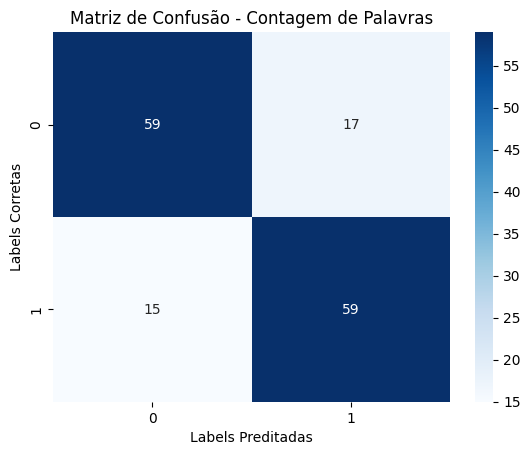

In [ ]:
print("Matriz de confusão do modelo para IMDB com Regressão Logística")

cm = confusion_matrix(data_aval_imdbY, RL_imdb_results)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Labels Preditadas')
plt.ylabel('Labels Corretas')
plt.title('Matriz de Confusão - Contagem de Palavras')
plt.show()

### Dataset IMDB com Gradient Tree Boosting

In [ ]:
# Treinamento e Predição do modelo - Gradient Tree Boosting
GTB_imdb = GradientBoostingClassifier(n_estimators=500) # TF-IDF = 500, CP=500
GTB_imdb.fit(data_treino_imdbX, data_treino_imdbY)

GTB_imdb_results = GTB_imdb.predict(data_aval_imdbX)

# Medidas de Avalição

# Acurácia
GTB_acuracy_imdb = accuracy_score(data_aval_imdbY, GTB_imdb_results)

print("Taxa de acerto usando métrica de acurácia, usando o método de  Gradient Tree Boosting, no IMDB: ", GTB_acuracy_imdb )

# Classification Report
print(classification_report(data_aval_imdbY, GTB_imdb_results, target_names=['Avaliações Positivas', 'Avaliações Negativas']))


Taxa de acerto usando métrica de acurácia, usando o método de  Gradient Tree Boosting, no IMDB:  0.7266666666666667
                      precision    recall  f1-score   support

Avaliações Positivas       0.73      0.74      0.73        76
Avaliações Negativas       0.73      0.72      0.72        74

            accuracy                           0.73       150
           macro avg       0.73      0.73      0.73       150
        weighted avg       0.73      0.73      0.73       150



Matriz de confusão do modelo para IMDB com Gradient Tree Boosting


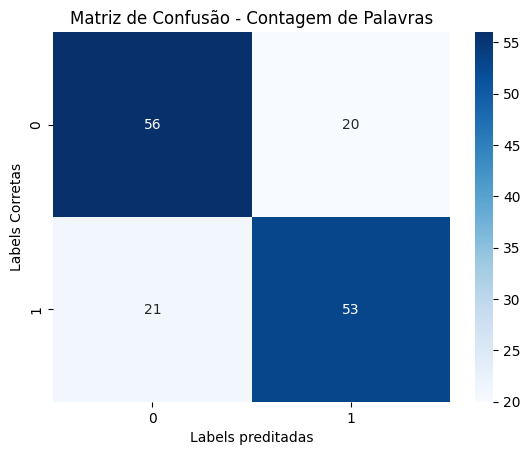

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

print("Matriz de confusão do modelo para IMDB com Gradient Tree Boosting")

cm = confusion_matrix(data_aval_imdbY, GTB_imdb_results)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Labels preditadas')
plt.ylabel('Labels Corretas')
plt.title('Matriz de Confusão - Contagem de Palavras')
plt.show()

### Dataset Yelp com Regressão Logística

In [ ]:
# Treinamento e Predição do modelo - Regressão Logistica
RL_yelp = LogisticRegression(random_state=0, solver='liblinear')
RL_yelp = RL_yelp.fit(data_treino_yelpX, data_treino_yelpY)

RL_yelp_results = RL_yelp.predict(data_aval_yelpX)

# Medidas de Avalição

# Acurácia
RL_acuracy_yelp = accuracy_score(data_aval_yelpY, RL_yelp_results) #verificação da acurácia da Regressão logística

print("Taxa de acerto usando métrica de acurácia, usando o método de regressão logística, no yelp: ", RL_acuracy_yelp )

# Classification Report
print(classification_report(data_aval_yelpY, RL_yelp_results, target_names=['Avaliações Positivas', 'Avaliações Negativas']))

Taxa de acerto usando métrica de acurácia, usando o método de regressão logística, no yelp:  0.785
                      precision    recall  f1-score   support

Avaliações Positivas       0.73      0.89      0.80        96
Avaliações Negativas       0.87      0.69      0.77       104

            accuracy                           0.79       200
           macro avg       0.80      0.79      0.78       200
        weighted avg       0.80      0.79      0.78       200



In [ ]:
print("Matriz de confusão do modelo para Yelp com Regressão Logística")

cm = confusion_matrix(data_aval_yelpY, RL_yelp_results)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Labels preditadas')
plt.ylabel('Labels Corretas')
plt.title('Matriz de confusão')
plt.show()

Matriz de confusão do modelo para Yelp com Regressão Logística


NameError: ignored

### Dataset Yelp com Gradient Tree Boosting

In [ ]:
# Treinamento e Predição do modelo
GTB_yelp = GradientBoostingClassifier(n_estimators=1000) # TF-IDF = 1000, CP=500=1000
GTB_yelp = GTB_yelp.fit(data_treino_yelpX, data_treino_yelpY)

GTB_yelp_results = GTB_yelp.predict(data_aval_yelpX)

# Medidas de Avalição

# Acurácia
GTB_acuracy_yelp = accuracy_score(data_aval_yelpY, GTB_yelp_results)

print("Taxa de acerto usando métrica de acurácia, usando o método de Gradient Tree Boosting, no yelp: ", GTB_acuracy_yelp )

# Classification Report
print(classification_report(data_aval_yelpY, GTB_yelp_results, target_names=['Avaliações Positivas', 'Avaliações Negativas']))

Taxa de acerto usando métrica de acurácia, usando o método de Gradient Tree Boosting, no yelp:  0.76
                      precision    recall  f1-score   support

Avaliações Positivas       0.69      0.92      0.79        96
Avaliações Negativas       0.89      0.62      0.73       104

            accuracy                           0.76       200
           macro avg       0.79      0.77      0.76       200
        weighted avg       0.79      0.76      0.76       200



Matriz de confusão do modelo para Yelp com Gradient Tree Boosting


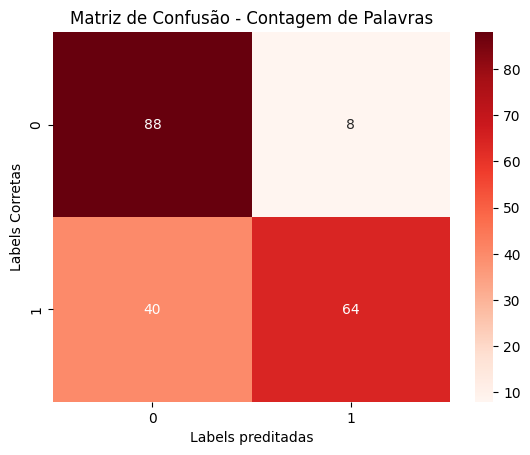

In [ ]:
print("Matriz de confusão do modelo para Yelp com Gradient Tree Boosting")

cm = confusion_matrix(data_aval_yelpY, GTB_yelp_results)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Labels preditadas')
plt.ylabel('Labels Corretas')
plt.title('Matriz de Confusão - Contagem de Palavras')
plt.show()

### Dataset Amazon com Regressão Logística

In [ ]:
# Treinamento e Predição do modelo - Regressão Logistica
RL_amazon = LogisticRegression(random_state=0, solver='liblinear')
RL_amazon = RL_amazon.fit(data_treino_amazonX, data_treino_amazonY)

RL_amazon_results = RL_amazon.predict(data_aval_amazonX)

# Medidas de Avalição

# Acurácia
RL_acuracy_amazon = accuracy_score(data_aval_amazonY, RL_amazon_results)

print("Taxa de acerto usando métrica de acurácia, usando o método de regressão logística, no dataset da Amazon: ", RL_acuracy_amazon )

# Classification Report
print(classification_report(data_aval_amazonY, RL_amazon_results, target_names=['Avaliações Positivas', 'Avaliações Negativas']))

Taxa de acerto usando métrica de acurácia, usando o método de regressão logística, no dataset da Amazon:  0.8516666666666667
                      precision    recall  f1-score   support

Avaliações Positivas       0.86      0.87      0.86       657
Avaliações Negativas       0.84      0.83      0.84       543

            accuracy                           0.85      1200
           macro avg       0.85      0.85      0.85      1200
        weighted avg       0.85      0.85      0.85      1200



Matriz de confusão do modelo para Amazon com Regressão Logística


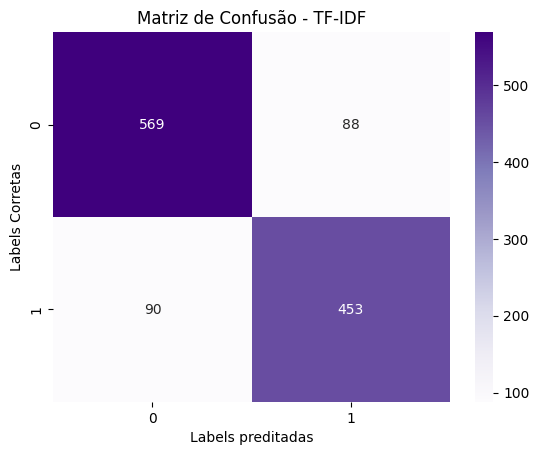

In [ ]:
print("Matriz de confusão do modelo para Amazon com Regressão Logística")

cm = confusion_matrix(data_aval_amazonY, RL_amazon_results)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Labels preditadas')
plt.ylabel('Labels Corretas')
plt.title('Matriz de Confusão - TF-IDF')
plt.show()

### Dataset Amazon com Gradient Tree Boosting

In [ ]:
# Treinamento e Predição do modelo
GTB_amazon = GradientBoostingClassifier(n_estimators=1000) # TF-IDF = 1000, CP=500
GTB_amazon = GTB_amazon.fit(data_treino_amazonX, data_treino_amazonY)

GTB_amazon_results = GTB_amazon.predict(data_aval_amazonX)

# Medidas de Avalição

# Acurácia
GTB_acuracy_amazon = accuracy_score(data_aval_amazonY, GTB_amazon_results)

print("Taxa de acerto usando métrica de acurácia, usando o método de Gradient Tree Boosting, no dataset da Amazon: ", GTB_acuracy_amazon )

# Classification Report
print(classification_report(data_aval_amazonY, GTB_amazon_results, target_names=['Avaliações Positivas', 'Avaliações Negativas']))

Taxa de acerto usando métrica de acurácia, usando o método de Gradient Tree Boosting, no dataset da Amazon:  0.83
                      precision    recall  f1-score   support

Avaliações Positivas       0.84      0.85      0.85       657
Avaliações Negativas       0.82      0.80      0.81       543

            accuracy                           0.83      1200
           macro avg       0.83      0.83      0.83      1200
        weighted avg       0.83      0.83      0.83      1200



Matriz de confusão do modelo para Amazon com Gradient Tree Boosting 


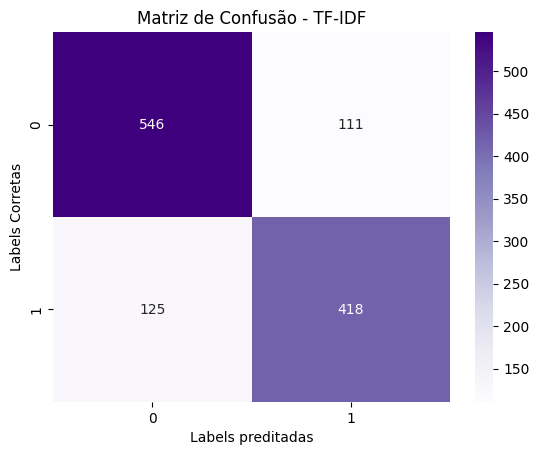

In [ ]:
print("Matriz de confusão do modelo para Amazon com Gradient Tree Boosting ")

cm = confusion_matrix(data_aval_amazonY, GTB_amazon_results)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Labels preditadas')
plt.ylabel('Labels Corretas')
plt.title('Matriz de Confusão - TF-IDF')
plt.show()

## Testes com Tranfer Learning com o Count Vectorizer

Anteriormente foi feito o treinamento e a classificação separadamente para cada dataset. Isso significa que é possível que os modelos que foram treinados com avaliações de filmes do IMDB podem ter um desempenho diferente na classificação de estabelecimentos comerciais do Yelp, por exemplo. Com o objetivo de tentar entender se o contexto nesse caso influencia nos resultados de predição do modelo, vamos aplicar Transfer Learning, ou seja, usar modelos treinados com um determinado contexto para classificar amostras de contextos diferentes. É interessante constatarmos o impacto dessa mudança e verificar como o modelo se comporta.

Só foi possível realizar esse processo com a vetorização por meio de contagem de palavras porque ela permite que palavras que não pertencem ao dataset sejam vetorizadas com as mesmas palavras que ele, o que não acontece com o TF-IDF.


### Modelo do IMDB Classificando Dados do Yelp

In [ ]:
# Regressão Linear

# Transformando o data set do Yelp em uma vetorização aceita pelo modelo do IMDB
TL_imdb_yelp = vect1.transform(data_yelp.Avaliation)
val_result_RL = RL_imdb.predict(TL_imdb_yelp) # Fazendo a prediação

# Medindo a acurácia
acuracy_RL = accuracy_score(data_yelp.Sentiment, val_result_RL)

# Gradiente Tree Bosting

# Transformando o data set do Yelp em uma vetorização aceita pelo modelo do IMDB
TL_imdb_yelp = vect1.transform(data_yelp.Avaliation)
val_result_GTB = GTB_imdb.predict(TL_imdb_yelp) # Fazendo a prediação

# Medindo a acurácia
acuracy_GTB = accuracy_score(data_yelp.Sentiment, val_result_GTB)

print("Acurácia para o modelo de Regressão Logística:", acuracy_RL)
print("Acurácia para o modelo de Gradient Tree Boosting:", acuracy_GTB)

Acurácia para o modelo de Regressão Logística: 0.69
Acurácia para o modelo de Gradient Tree Boosting: 0.632


### Modelo do IMDB Classificando Dados da Amazon

In [ ]:
# Regressão Linear

# Transformando o data set da Amazon em uma vetorização aceita pelo modelo do IMDB
TL_imdb_amazon = vect1.transform(data_amazon.Avaliation)
val_result_RL = RL_imdb.predict(TL_imdb_amazon) # Fazendo a prediação

# Medindo a acurácia
acuracy_RL = accuracy_score(data_amazon.Sentiment, val_result_RL)

# Gradiente Tree Bosting

# Transformando o data set da amazon em uma vetorização aceita pelo modelo do IMDB
TL_imdb_amazon = vect1.transform(data_amazon.Avaliation)
val_result_GTB = GTB_imdb.predict(TL_imdb_amazon) # Fazendo a prediação

# Medindo a acurácia
acuracy_GTB = accuracy_score(data_amazon.Sentiment, val_result_GTB)

print("Acurácia para o modelo de Regressão Logística:", acuracy_RL)
print("Acurácia para o modelo de Gradient Tree Boosting:", acuracy_GTB)

Acurácia para o modelo de Regressão Logística: 0.729
Acurácia para o modelo de Gradient Tree Boosting: 0.602


### Modelo do Yelp Classificando Dados da IMDB

In [ ]:
# Regressão Linear

# Transformando o data set IMDB em uma vetorização aceita pelo modelo Yelp
TL_yelp_imdb = vect2.transform(data_imdb.Avaliation)
val_result_RL = RL_yelp.predict(TL_yelp_imdb) # Fazendo a prediação

# Medindo a acurácia
acuracy_RL = accuracy_score(data_imdb.Sentiment, val_result_RL)

# Gradiente Tree Bosting

# Transformando o data set da IMDB em uma vetorização aceita pelo modelo do Yelp
TL_yelp_imdb = vect2.transform(data_imdb.Avaliation)
val_result_GTB = GTB_yelp.predict(TL_yelp_imdb) # Fazendo a prediação

# Medindo a acurácia
acuracy_GTB = accuracy_score(data_imdb.Sentiment, val_result_GTB)

print("Acurácia para o modelo de Regressão Logística:", acuracy_RL)
print("Acurácia para o modelo de Gradient Tree Boosting:", acuracy_GTB)

Acurácia para o modelo de Regressão Logística: 0.6550802139037433
Acurácia para o modelo de Gradient Tree Boosting: 0.6176470588235294


### Modelo do Yelp Classificando Dados da Amazon

In [ ]:
# Regressão Linear

# Transformando o data set Amazon em uma vetorização aceita pelo modelo Yelp
TL_yelp_amazon = vect2.transform(data_amazon.Avaliation)
val_result_RL = RL_yelp.predict(TL_yelp_amazon) # Fazendo a prediação

# Medindo a acurácia
acuracy_RL = accuracy_score(data_amazon.Sentiment, val_result_RL)

# Gradiente Tree Bosting

# Transformando o data set da Amazon em uma vetorização aceita pelo modelo do Yelp
TL_yelp_amazon = vect2.transform(data_amazon.Avaliation)
val_result_GTB = GTB_yelp.predict(TL_yelp_amazon) # Fazendo a prediação

# Medindo a acurácia
acuracy_GTB = accuracy_score(data_amazon.Sentiment, val_result_GTB)

print("Acurácia para o modelo de Regressão Logística:", acuracy_RL)
print("Acurácia para o modelo de Gradient Tree Boosting:", acuracy_GTB)

Acurácia para o modelo de Regressão Logística: 0.716
Acurácia para o modelo de Gradient Tree Boosting: 0.721


### Modelo da Amazon Classificando Dados do IMDB

In [ ]:
# Regressão Linear

# Transformando o data set IMDB em uma vetorização aceita pelo modelo Amazon
TL_amazon_imdb = vect3.transform(data_imdb.Avaliation)
val_result_RL = RL_amazon.predict(TL_amazon_imdb) # Fazendo a prediação

# Medindo a acurácia
acuracy_RL = accuracy_score(data_imdb.Sentiment, val_result_RL)

# Gradiente Tree Bosting

# Transformando o data set da IMDB em uma vetorização aceita pelo modelo Amazon
TL_amazon_imdb = vect3.transform(data_imdb.Avaliation)
val_result_GTB = GTB_amazon.predict(TL_amazon_imdb) # Fazendo a prediação

# Medindo a acurácia
acuracy_GTB = accuracy_score(data_imdb.Sentiment, val_result_GTB)

print("Acurácia para o modelo de Regressão Logística:", acuracy_RL)
print("Acurácia para o modelo de Gradient Tree Boosting:", acuracy_GTB)

Acurácia para o modelo de Regressão Logística: 0.6657754010695187
Acurácia para o modelo de Gradient Tree Boosting: 0.6082887700534759


### Modelo da Amazon Classificando Dados do Yelp

In [ ]:
# Regressão Linear

# Transformando o data set Yelp em uma vetorização aceita pelo modelo Amazon
TL_amazon_yelp = vect3.transform(data_yelp.Avaliation)
val_result_RL = RL_amazon.predict(TL_amazon_yelp) # Fazendo a prediação

# Medindo a acurácia
acuracy_RL = accuracy_score(data_yelp.Sentiment, val_result_RL)

# Gradiente Tree Bosting

# Transformando o data set da Yelp em uma vetorização aceita pelo modelo Amazon
TL_amazon_yelp = vect3.transform(data_yelp.Avaliation)
val_result_GTB = GTB_amazon.predict(TL_amazon_yelp) # Fazendo a prediação

# Medindo a acurácia
acuracy_GTB = accuracy_score(data_yelp.Sentiment, val_result_GTB)

print("Acurácia para o modelo de Regressão Logística:", acuracy_RL)
print("Acurácia para o modelo de Gradient Tree Boosting:", acuracy_GTB)

Acurácia para o modelo de Regressão Logística: 0.681
Acurácia para o modelo de Gradient Tree Boosting: 0.674


## Classificando Frases Individualmente

Aqui, podemos classificar qualquer frase da língua inglesa utilizando qualquer um dos modelos treinados com os datasets e os classificadores diferentes

In [ ]:
# Exemplo de frases para uso
exemplo1 = 'The case is terrible'
exemplo2 = 'The room it is so good, very confortable amazing!'
exemplo3 = "I didn't hate"
exemplo4 = "I expected more, thought it would be better"

# Para testar, basta inserir uma frase na célula
while True:
  message = input()
  if(message=="exit"): break
  res = RL_amazon.predict(vect3.transform([message]))
  if(res[0]): print("Positive :)")
  elif(not res[0]): print("Negative :(")




##Links de Consulta e Referência

https://github.com/gabrielschade/IA/blob/master/ClassificacaoComentariosComNaiveBayes/sentiment.ipynb

https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76

https://gabrielschade.github.io/2018/04/16/machine-learning-classificador.html

https://www.youtube.com/watch?v=zi16nl82AMA&ab_channel=sentdex

https://www.lambda3.com.br/2019/04/inteligencia-artificial-como-fazer-analise-de-sentimentos-com-python-parte-1/

https://dadosaocubo.com/nlp-com-scikit-learn/